# 3. Analysis & Scientific Report
This notebook contains the detailed analysis of the model performance, feature importance, and the results of the comparative study.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Load Data & Train Model on fly for analysis
data_path = "../data/processed/final_dataset.csv"
df = pd.read_csv(data_path)
X = df.drop("cardio", axis=1)
y = df["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Load params (Champion Model)
params = {'n_estimators': 300, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.5, 'subsample': 0.8, 'colsample_bytree': 0.8, 'eval_metric': 'logloss', 'use_label_encoder': False}
model = XGBClassifier(**params)
model.fit(X_train, y_train)
print("Champion Model Trained.")

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [22:30:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Champion Model Trained.


## 1. Feature Importance Analysis
Which medical indicators contribute most to the prediction?

/var/folders/w6/66pw6slx2llf017mfplrr4pc0000gn/T/ipykernel_23623/740395086.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


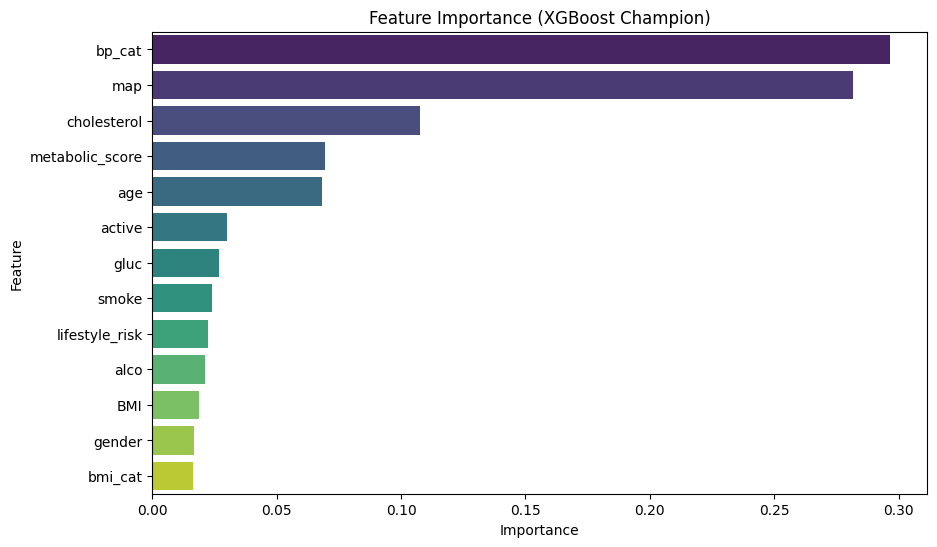

In [3]:
importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance (XGBoost Champion)')
plt.show()

## 2. Correlation Matrix
Visualizing relationship between processed features.

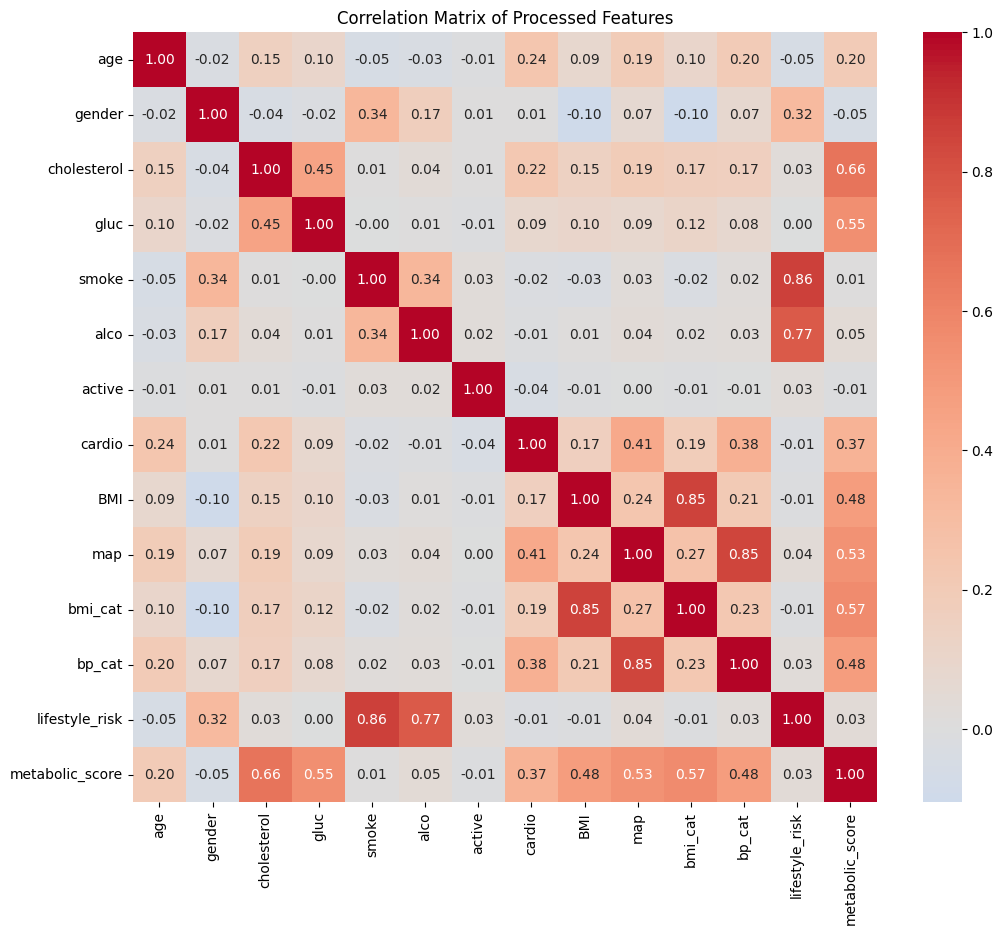

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Processed Features')
plt.show()

## 3. Overfitting Analysis (Train vs Test)
Checking reliability of the Champion Model.

Training Accuracy: 74.08%
Testing Accuracy:  73.13%
Gap:               0.94%


/var/folders/w6/66pw6slx2llf017mfplrr4pc0000gn/T/ipykernel_23623/836643542.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Training', 'Testing'], y=[train_acc, test_acc], palette='pastel')


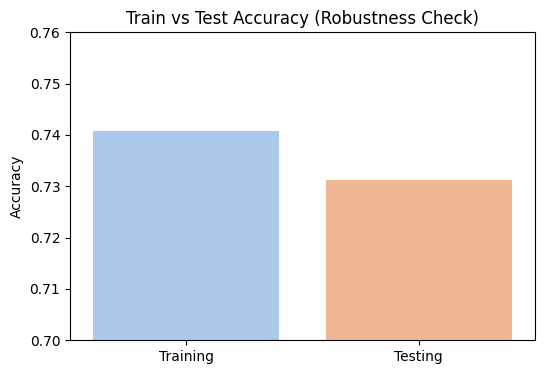

In [5]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy:  {test_acc*100:.2f}%")
print(f"Gap:               {train_acc*100 - test_acc*100:.2f}%")

# Viz
plt.figure(figsize=(6,4))
sns.barplot(x=['Training', 'Testing'], y=[train_acc, test_acc], palette='pastel')
plt.ylim(0.7, 0.76)
plt.title("Train vs Test Accuracy (Robustness Check)")
plt.ylabel("Accuracy")
plt.show()

## 4. Confusion Matrix
Analysis of False Positives vs False Negatives.

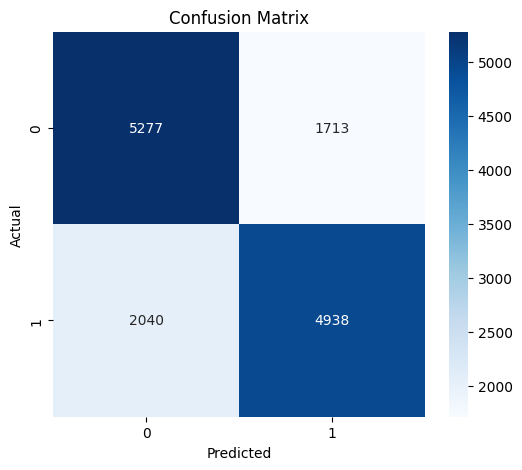

In [6]:
cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()